# Практическая работа №2

## Импорт необходимых библиотек

In [1]:
import warnings

warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from math import log
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsRegressor
from typing import Union
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

In [2]:
dataframe_train = pd.read_csv("../data/train.csv")
dataframe_test = pd.read_csv("../data/test.csv")
dataframe_train.head(10)

,id,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
0,896,2,0,46.0,3,5,0,0,0,0,...,2,3,0,7,3,13,2,7,18,2350000.0
1,399,2,0,44.6,5,5,0,0,0,0,...,3,5,0,7,3,11,1,4,11,1799000.0
2,1515,2,0,53.0,1,9,0,1,0,0,...,4,11,0,5,3,17,3,7,15,2800000.0
3,1216,2,0,64.0,4,5,0,0,0,1,...,31,5,1,55,2,10,28,32,17,3970000.0
4,677,1,0,33.3,1,10,0,0,1,0,...,1,3,0,2,3,9,0,3,6,1880000.0
5,1210,2,0,46.0,3,4,0,0,0,0,...,38,6,2,15,0,27,9,11,25,2400000.0
6,1485,1,0,45.0,8,9,0,1,0,0,...,8,9,0,8,1,33,4,4,15,2870000.0
7,1557,2,0,54.5,3,14,0,1,0,0,...,11,4,1,12,4,15,2,14,14,2700000.0
8,1482,4,0,86.0,1,10,0,1,0,0,...,16,11,0,9,2,42,12,10,30,3200000.0
9,295,2,0,42.0,2,5,0,0,0,0,...,22,5,0,10,1,13,2,13,17,2560000.0


Выведем информацию о таблицах.

In [3]:
dataframe_train.info()
dataframe_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         808 non-null    int64  
 1   Количество.комнат          808 non-null    int64  
 2   Студия                     808 non-null    int64  
 3   Общая.площадь              808 non-null    float64
 4   Этаж                       808 non-null    int64  
 5   Этажей.в.доме              808 non-null    int64  
 6   Парковка                   808 non-null    int64  
 7   Без.ремонта                808 non-null    int64  
 8   Дизайнерский               808 non-null    int64  
 9   Евроремонт                 808 non-null    int64  
 10  Косметический              808 non-null    int64  
 11  Балкон                     808 non-null    int64  
 12  Лоджия                     808 non-null    int64  
 13  Совмещенный.санузел        808 non-null    int64  

In [4]:
dataframe_train.isnull().sum()

id                           0
Количество.комнат            0
Студия                       0
Общая.площадь                0
Этаж                         0
Этажей.в.доме                0
Парковка                     0
Без.ремонта                  0
Дизайнерский                 0
Евроремонт                   0
Косметический                0
Балкон                       0
Лоджия                       0
Совмещенный.санузел          0
Раздельный.санузел           0
Лифт                         0
Грузовой.лифт                0
Мусоропровод                 0
Год.постройки                0
Аварийный                    0
Железобетонные.перекрытия    0
Смешанные.перекрытия         0
Деревянные.перекрытия        0
Иные.перекрытия              0
Панельные.стены              0
Блочные.стены                0
Деревянные.стены             0
Кирпичные.стены              0
Монолитные.стены             0
Смешанные.стены              0
Школа.1000                   0
ВУЗ.1000                     0
ТЦ.1000 

Из вывода видно, что в столбцах нет пустых значений.

In [5]:
dataframe_train.describe()

,id,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,...,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02
mean,794.887376,2.039604,0.040842,50.781176,4.894802,8.935644,0.142327,0.101485,0.024752,0.101485,...,10.372525,4.674505,0.143564,7.788366,2.501238,13.263614,4.149752,6.754950,13.470297,2.699083e+06
std,461.218298,0.996109,0.198046,19.827507,3.760826,4.754526,0.349601,0.302157,0.155466,0.302157,...,15.397133,3.255991,0.378064,8.983450,1.636025,7.557860,5.955523,6.873569,8.068579,1.096460e+06
min,1.000000,1.000000,0.000000,10.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.990000e+05
25%,406.500000,1.000000,0.000000,37.650000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,3.000000,1.000000,8.000000,1.000000,2.000000,7.000000,1.950000e+06
50%,774.500000,2.000000,0.000000,48.000000,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,4.000000,0.000000,6.000000,2.000000,13.000000,3.000000,5.000000,12.000000,2.550000e+06
75%,1181.500000,3.000000,0.000000,63.075000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,7.000000,0.000000,9.000000,4.000000,18.000000,5.000000,10.000000,19.000000,3.310000e+06
max,1615.000000,5.000000,1.000000,120.000000,24.000000,26.000000,1.000000,1.000000,1.000000,1.000000,...,86.000000,14.000000,2.000000,67.000000,8.000000,42.000000,52.000000,40.000000,40.000000,6.800000e+06


Изначально уже проведено кодирование категориальных признаков. Чтобы избежать «ловушки фиктивной переменной», необходимо сделать следующее: если у нас n вариантов категориального признака, то надо оставить n-1 фиктивных колонок после одноразового кодирования. Оставляя n-1 фиктивных колонок, мы убираем линейную зависимость между фиктивными колонками и делаем нашу модель более стабильной и точной.

In [6]:
dataframe_train.drop("Евроремонт", axis=1, inplace=True)
dataframe_train.drop("Совмещенный.санузел", axis=1, inplace=True)
dataframe_train.drop("Деревянные.перекрытия", axis=1, inplace=True)
dataframe_train.drop("Деревянные.стены", axis=1, inplace=True)

Так как признак id не играет важной роли в предсказании, то можем удалить его из датафреймов.

In [7]:
dataframe_train.drop("id", axis=1, inplace=True)
test_ids = dataframe_test["id"]
dataframe_test.drop("id", axis=1, inplace=True)

Разделим наши признаки на категориальные и числовые.

In [8]:
result_column = "Цена"

# Получаем серию с количеством уникальных значений в каждом столбце
nunique = dataframe_train.nunique()

# Фильтруем серию по условию (в данном случае выбираем столбцы с более чем 5 уникальными значениями)
first_nunique = nunique[nunique > 5]

second_nunique = nunique[nunique <= 5]

# Получаем индекс отфильтрованной серии
first_index = first_nunique.index
second_index = second_nunique.index

# Преобразуем индекс в список
dataframe_numerical = first_index.tolist()
dataframe_numerical.remove(result_column)

# Преобразуем индекс в список
dataframe_categorical = second_index.tolist()

dataframe_all = dataframe_numerical + dataframe_categorical
dataframe_categorical

['Количество.комнат',
 'Студия',
 'Парковка',
 'Без.ремонта',
 'Дизайнерский',
 'Косметический',
 'Балкон',
 'Лоджия',
 'Раздельный.санузел',
 'Лифт',
 'Грузовой.лифт',
 'Мусоропровод',
 'Аварийный',
 'Железобетонные.перекрытия',
 'Смешанные.перекрытия',
 'Иные.перекрытия',
 'Панельные.стены',
 'Блочные.стены',
 'Кирпичные.стены',
 'Монолитные.стены',
 'Смешанные.стены',
 'Парк.1000',
 'Кинотеатр.1000']

In [9]:
dataframe_numerical

['Общая.площадь',
 'Этаж',
 'Этажей.в.доме',
 'Год.постройки',
 'Школа.1000',
 'ВУЗ.1000',
 'ТЦ.1000',
 'Стоматология.1000',
 'Почта.1000',
 'Поликлиника.1000',
 'Остановка.1000',
 'Одежда..1000',
 'Супер3кет.1000',
 'Кафе.1000',
 'АЗС.1000',
 'Детский.сад.1000',
 'Бар.1000',
 'Банк.1000',
 'Аптека.1000']

Произведём нормирование числовых признаков.

In [10]:
min_max_scaler = MinMaxScaler()
dataframe_train[dataframe_numerical] = min_max_scaler.fit_transform(dataframe_train[dataframe_numerical])
dataframe_test[dataframe_numerical] = min_max_scaler.fit_transform(dataframe_test[dataframe_numerical])
dataframe_train.describe()

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Косметический,Балкон,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,...,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02
mean,2.039604,0.040842,0.370738,0.169339,0.288985,0.142327,0.101485,0.024752,0.772277,0.632426,...,0.120611,0.333893,0.143564,0.116244,0.312655,0.315800,0.079803,0.168874,0.336757,2.699083e+06
std,0.996109,0.198046,0.180250,0.163514,0.198105,0.349601,0.302157,0.155466,0.419622,0.635417,...,0.179036,0.232571,0.378064,0.134081,0.204503,0.179949,0.114529,0.171839,0.201714,1.096460e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.990000e+05
25%,1.000000,0.000000,0.251364,0.043478,0.125000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.023256,0.142857,0.000000,0.044776,0.125000,0.190476,0.019231,0.050000,0.175000,1.950000e+06
50%,2.000000,0.000000,0.345455,0.130435,0.291667,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.046512,0.285714,0.000000,0.089552,0.250000,0.309524,0.057692,0.125000,0.300000,2.550000e+06
75%,3.000000,0.000000,0.482500,0.217391,0.333333,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.139535,0.500000,0.000000,0.134328,0.500000,0.428571,0.096154,0.250000,0.475000,3.310000e+06
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.800000e+06


## Тепловые карты

Создадим тепловую карту из корреляционной матрицы (Корреляционная матрица - это квадратная таблица, которая показывает коэффициенты корреляции между несколькими переменными. Коэффициент корреляции - это мера линейной связи между двумя переменными, которая может принимать значения от -1 до 1. Корреляционная матрица позволяет видеть закономерности и взаимосвязи между переменными). Тепловая карта - это вид графика, который показывает данные в виде цветных прямоугольных плиток.

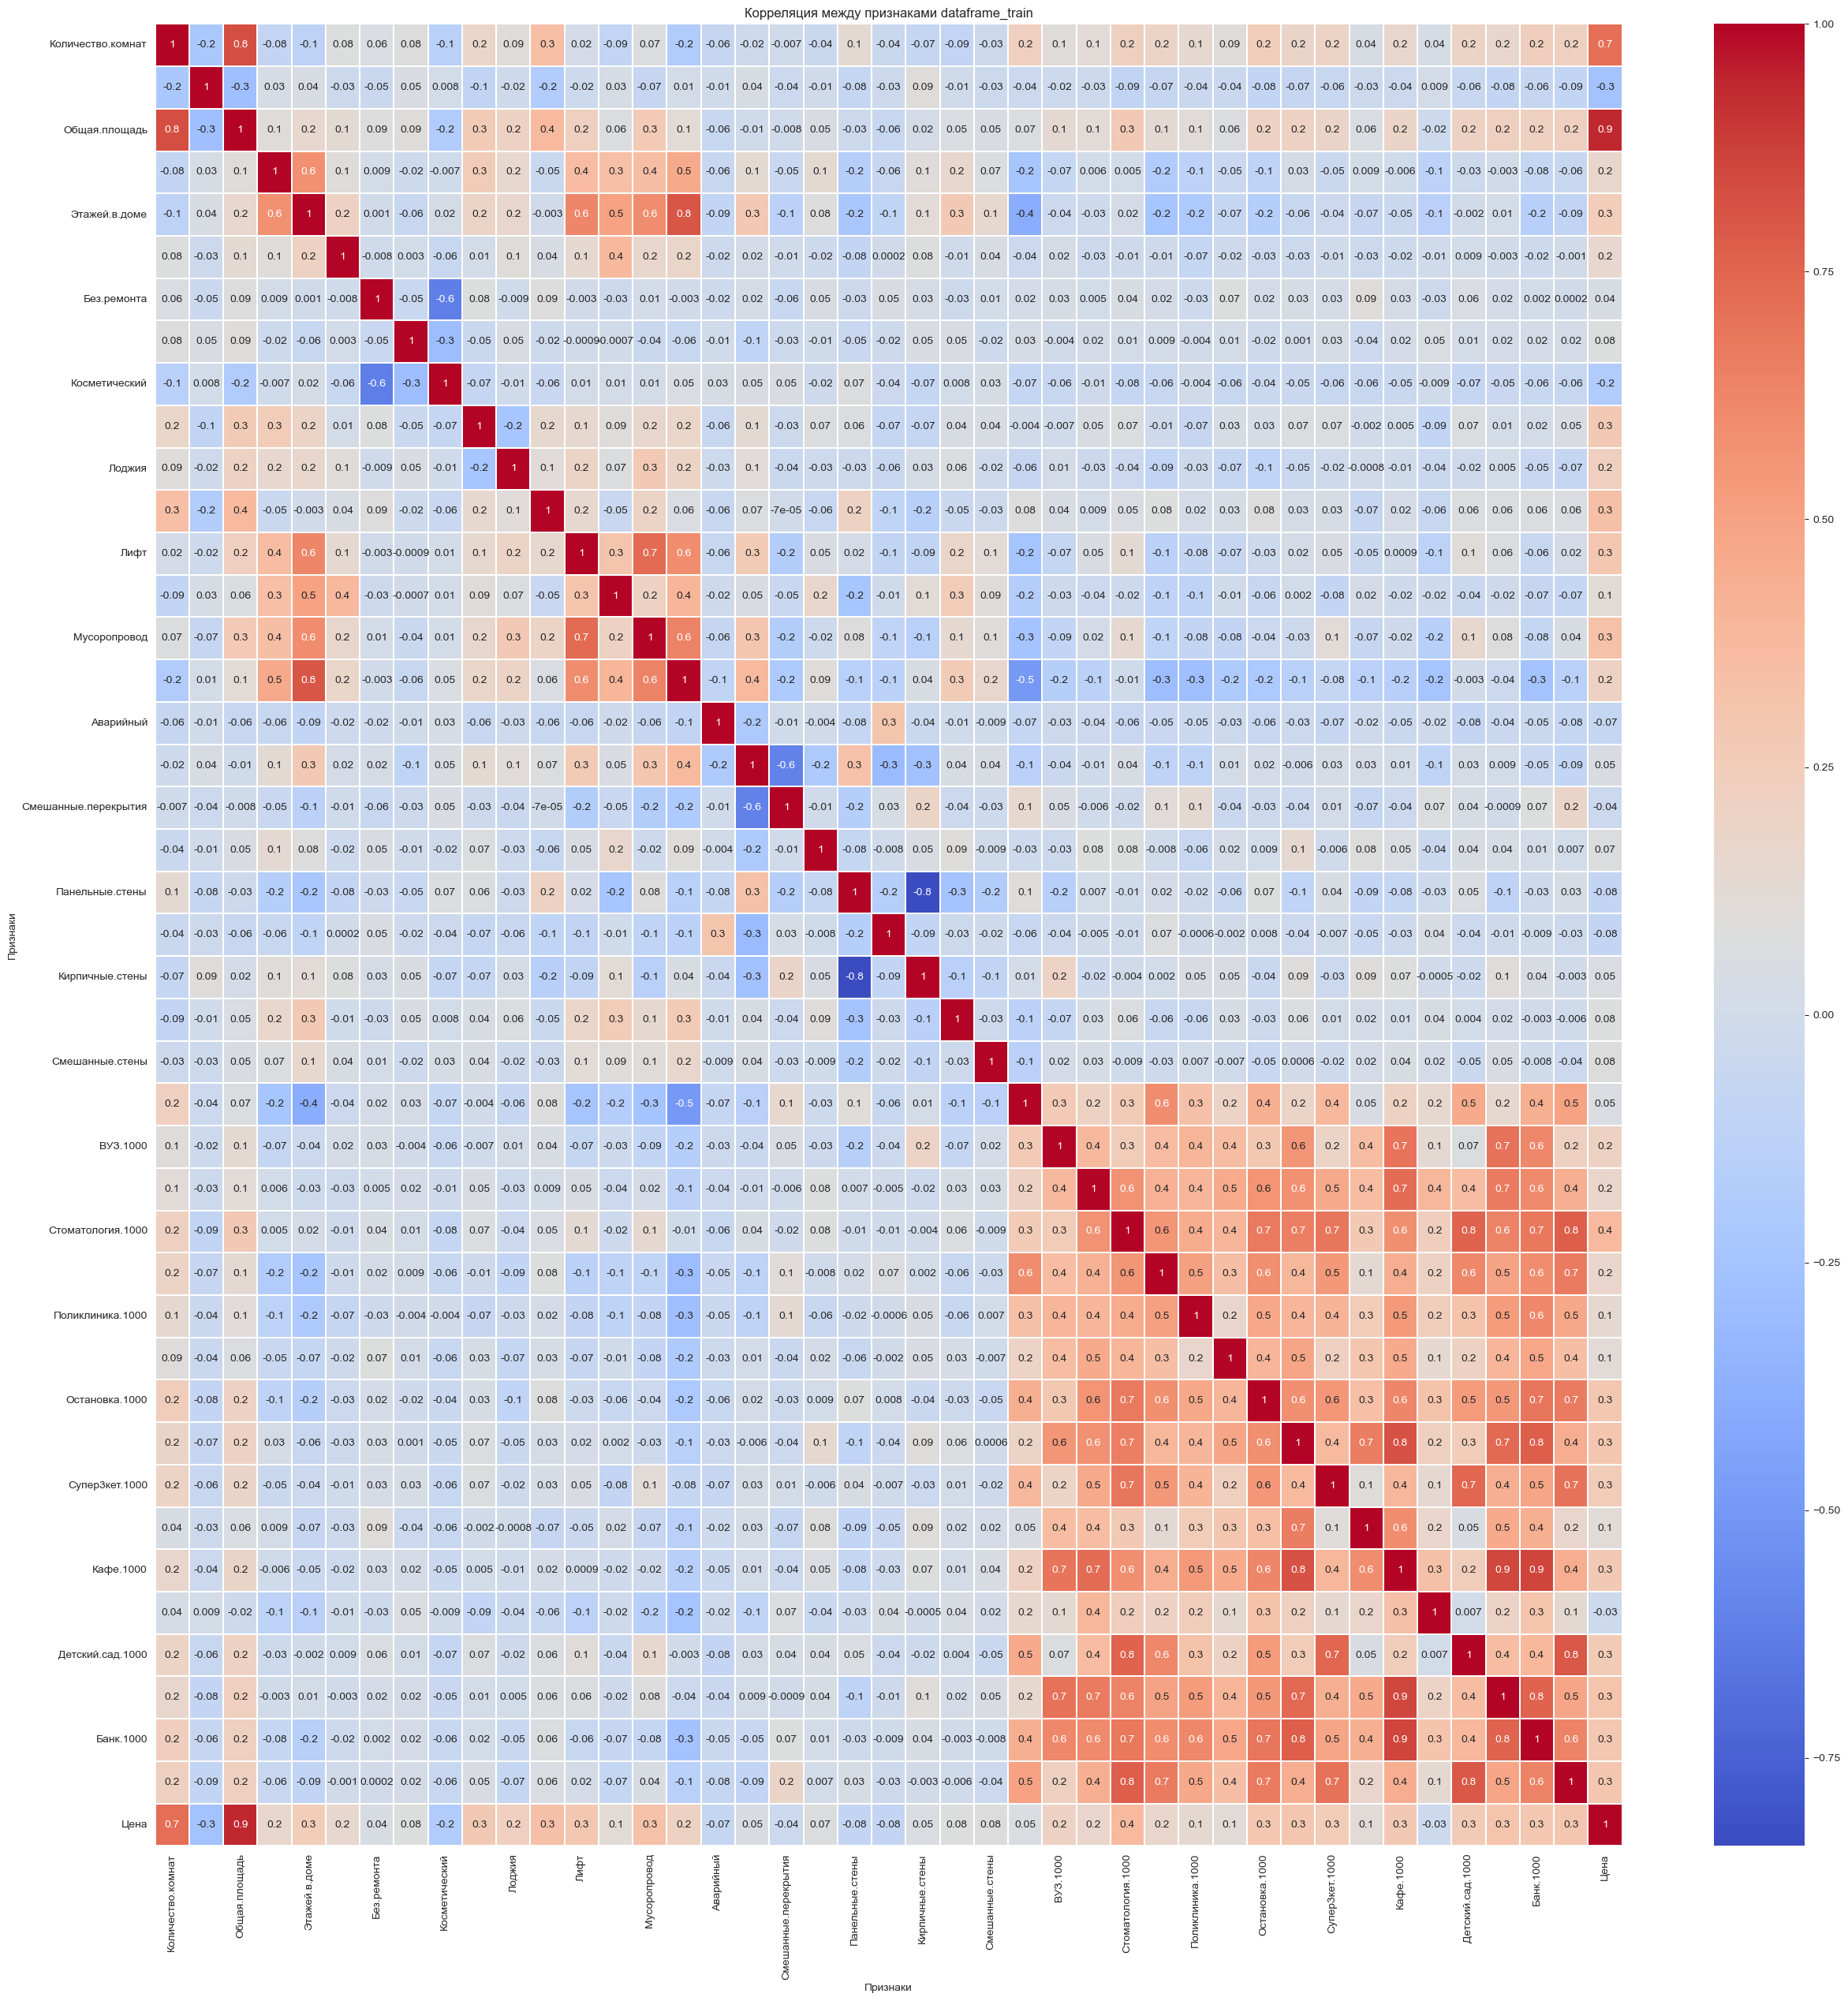

In [11]:
# Создаем тепловую карту с новой цветовой схемой и аргументом aspect
sb.heatmap(dataframe_train.corr(), annot=True, cmap='coolwarm', linewidths=0.2, fmt='.1g')

# Добавляем заголовок и подписи осей
plt.title('Корреляция между признаками dataframe_train')
plt.xlabel('Признаки')
plt.ylabel('Признаки')

fig = plt.gcf()
fig.set_size_inches(30, 30)

plt.show()

In [12]:
def show_heat_map(colums: list, title: str):
    """
    Тепловая карта для признаков
    :param colums: Список признаков, которые будут на тепловой карте
    :param title: Название
    :return: None
    """
    corr_price_dataframe = dataframe_train.corr()[['Цена']].transpose()[colums]

    # Строим тепловую карту для визуализации корреляционной матрицы
    sb.heatmap(corr_price_dataframe, annot=True, fmt='.1g', vmin=-1, vmax=1, cmap='coolwarm')

    # Устанавливаем размер изображения
    fig = plt.gcf()
    fig.set_size_inches(35, 5)

    plt.title(f"Корреляция между ценой и {title} признаками")
    plt.show()


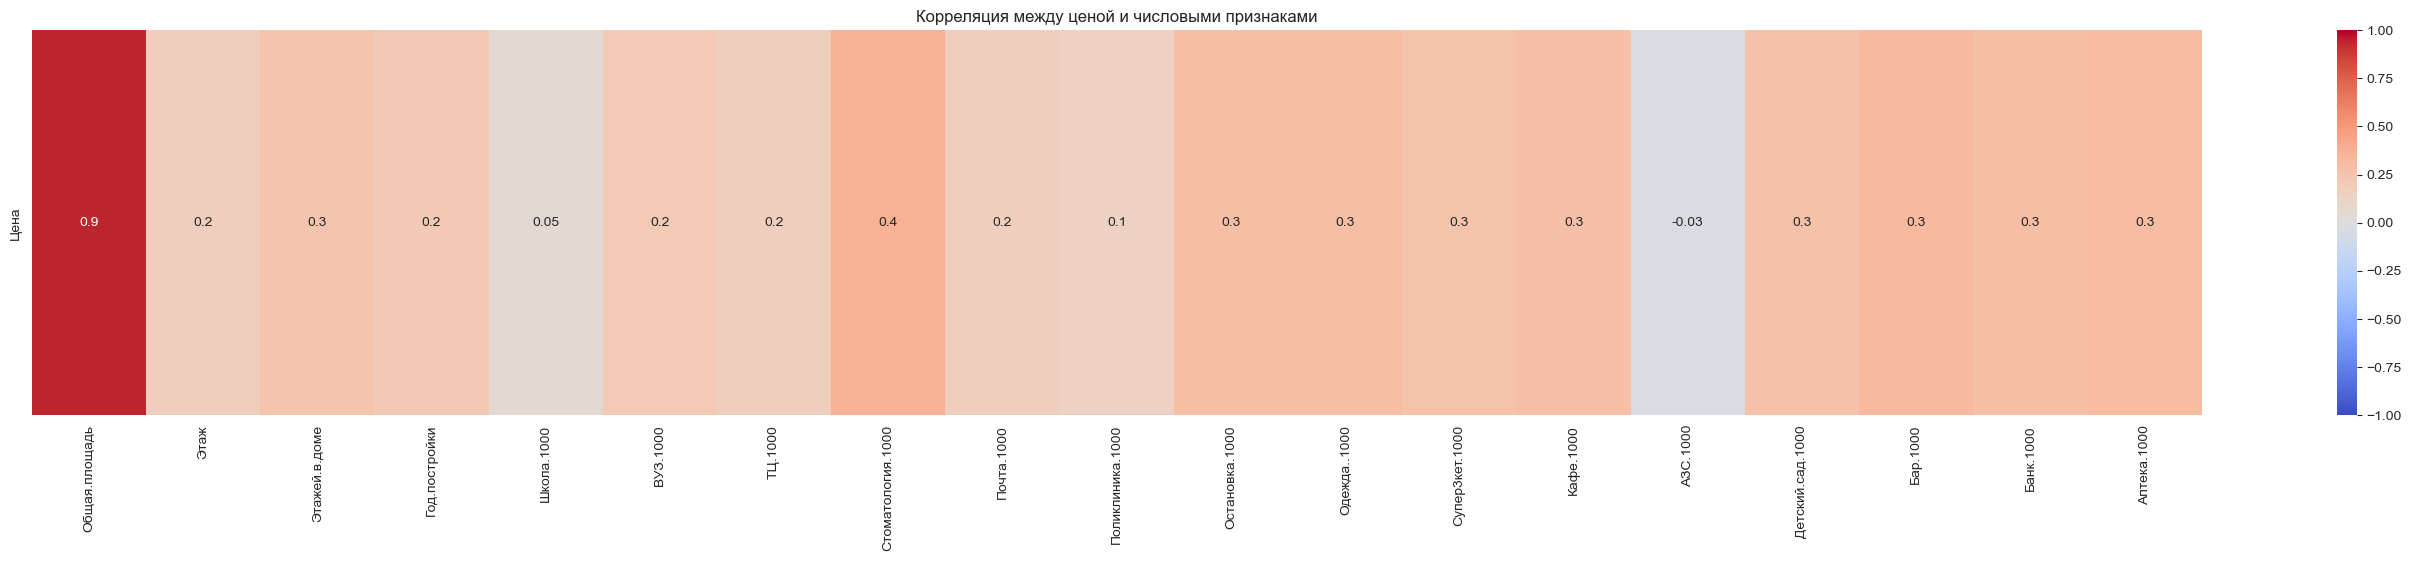

In [13]:
show_heat_map(dataframe_numerical, "числовыми")

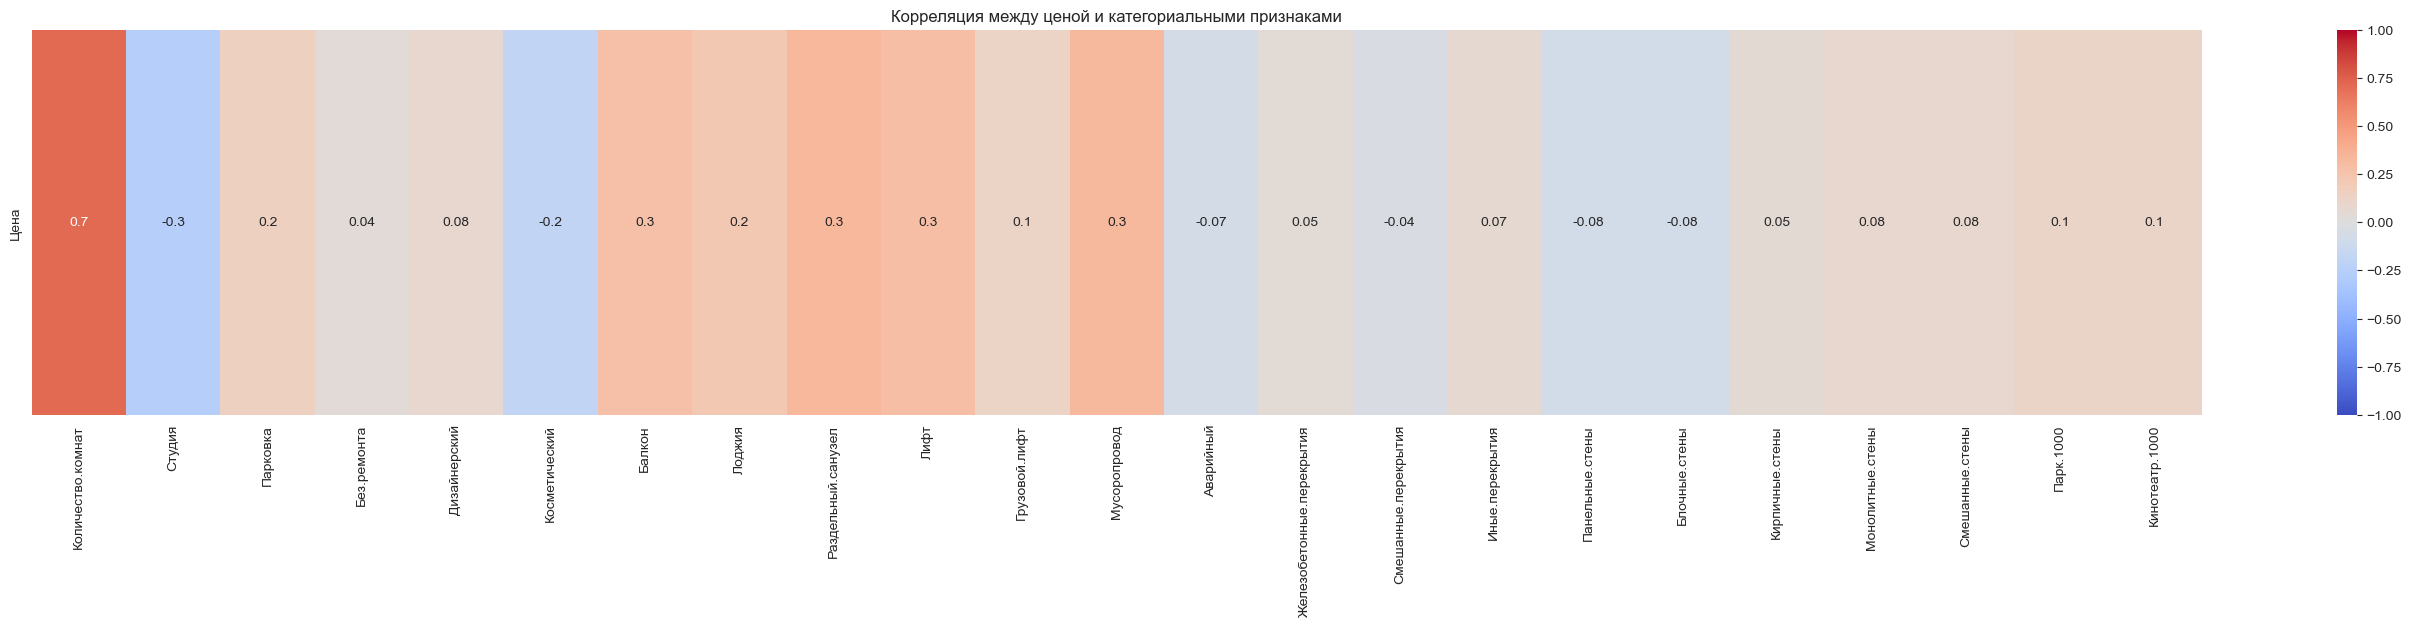

In [14]:
show_heat_map(dataframe_categorical, "категориальными")

In [15]:
dataframe_train.describe()

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Косметический,Балкон,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,...,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02
mean,2.039604,0.040842,0.370738,0.169339,0.288985,0.142327,0.101485,0.024752,0.772277,0.632426,...,0.120611,0.333893,0.143564,0.116244,0.312655,0.315800,0.079803,0.168874,0.336757,2.699083e+06
std,0.996109,0.198046,0.180250,0.163514,0.198105,0.349601,0.302157,0.155466,0.419622,0.635417,...,0.179036,0.232571,0.378064,0.134081,0.204503,0.179949,0.114529,0.171839,0.201714,1.096460e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.990000e+05
25%,1.000000,0.000000,0.251364,0.043478,0.125000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.023256,0.142857,0.000000,0.044776,0.125000,0.190476,0.019231,0.050000,0.175000,1.950000e+06
50%,2.000000,0.000000,0.345455,0.130435,0.291667,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.046512,0.285714,0.000000,0.089552,0.250000,0.309524,0.057692,0.125000,0.300000,2.550000e+06
75%,3.000000,0.000000,0.482500,0.217391,0.333333,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.139535,0.500000,0.000000,0.134328,0.500000,0.428571,0.096154,0.250000,0.475000,3.310000e+06
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.800000e+06
